<a href="https://colab.research.google.com/github/EdoardoMorucci/MyPadel/blob/main/MyPadel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_forehand = '/content/drive/MyDrive/MyPadel/DIRITTI_ROVESCI_10-05/DIRITTI.txt'
path_backhand = '/content/drive/MyDrive/MyPadel/DIRITTI_ROVESCI_10-05/ROVESCI.txt'
path_smash = '/content/drive/MyDrive/MyPadel/SMASH_VOLLEY_10-05/SMASH.txt'
path_lob = '/content/drive/MyDrive/MyPadel/SMASH_VOLLEY_10-05/VOLLEY.txt'

#Functions

In [ ]:
def show_data(timestamp, x, y, z, start, end, title):
  plt.title("Stroke visualization " + title)
  timestamp = timestamp[start:end]
  x = x[start:end]
  y = y[start:end]
  z = z[start:end]
  plt.plot(timestamp, x)
  plt.plot(timestamp, y)
  plt.plot(timestamp, z)
  plt.xlabel("Timestamp")
  plt.ylabel("Amplitude")
  plt.legend(["x", "y","z"])
  plt.show()

def triangle_filter(n):
    f = np.zeros((1+2*n))
    for i in range(n):
        f[i] = i+1
        f[-i-1] = i+1
    f[n] = n + 1
    return f / np.sum(f)

def smooth(data, smoothing_window):
  filter = triangle_filter(smoothing_window)
  tmp = np.pad(data, smoothing_window, mode='edge')
  res = np.convolve(tmp, filter, mode='valid')
  return res

def frequency_reduction(data, reduction_factor):
  res = []
  for i in range(0, len(data), reduction_factor):
    sum = 0
    if i + reduction_factor > len(data):
      return res
    for j in range(reduction_factor):
      sum += data[i+j]
    res.append(sum/reduction_factor)

  return res

In [ ]:
acc = []
gyr = []

with open(path_backhand,'r') as file:
  line_array = file.readlines()
  feature_vec = []
  
  count = 0
  for l in line_array:
    l_array = l.split(";")
    feature_vec = []
    feature_vec.append(float(l_array[1])) # timestamp
    feature_vec.append(float(l_array[2])) # x
    feature_vec.append(float(l_array[3])) # y
    feature_vec.append(float(l_array[4])) # z  

    if float(l_array[0]) == 0.0:
      acc.append(feature_vec)
    else:
      gyr.append(feature_vec)



In [ ]:
x_acc = []
y_acc = []
z_acc = []
timestamp_acc = []

for vett in acc:
  x_acc.append(vett[1])
  y_acc.append(vett[2])
  z_acc.append(vett[3])
  timestamp_acc.append(vett[0])

In [ ]:
print(len(x_acc))
print(len(timestamp_acc))
len_raw_dat = len(x_acc)

108437
108437


In [ ]:
x_gyr = []
y_gyr = []
z_gyr = []
timestamp_gyr = []

for vett in gyr:
  x_gyr.append(vett[1])
  y_gyr.append(vett[2])
  z_gyr.append(vett[3])
  timestamp_gyr.append(vett[0])
  

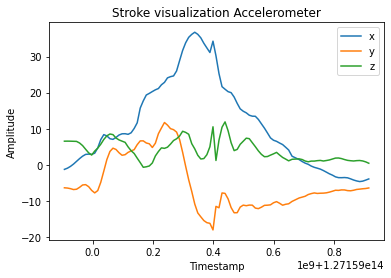

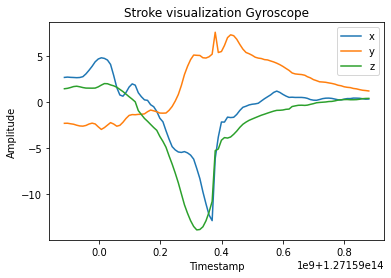

In [ ]:
start = 3200
end = 3300

show_data(timestamp_acc, x_acc, y_acc, z_acc, start, end, "Accelerometer")
show_data(timestamp_gyr, x_gyr, y_gyr, z_gyr, start, end, "Gyroscope")

In [ ]:
smoothing_window = 2

x_acc_smooth = smooth(x_acc, smoothing_window)
y_acc_smooth = smooth(y_acc, smoothing_window)
z_acc_smooth = smooth(z_acc, smoothing_window)

x_gyr_smooth = smooth(x_gyr, smoothing_window)
y_gyr_smooth = smooth(y_gyr, smoothing_window)
z_gyr_smooth = smooth(z_gyr, smoothing_window)

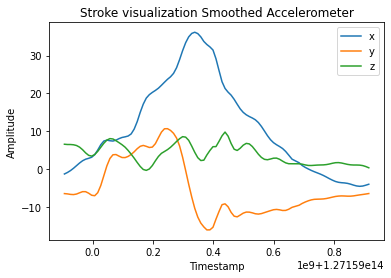

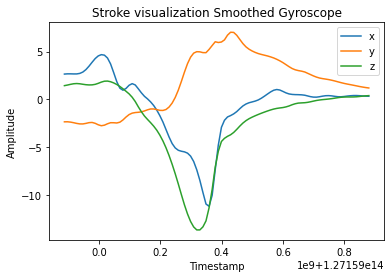

In [ ]:
show_data(timestamp_acc, x_acc_smooth, y_acc_smooth, z_acc_smooth, start, end, "Smoothed Accelerometer")
show_data(timestamp_gyr, x_gyr_smooth, y_gyr_smooth, z_gyr_smooth, start, end, "Smoothed Gyroscope")

In [ ]:
# reduction_factor = 2 means divide frequency by 2

reduction_factor = 4
timestamp_acc_red = frequency_reduction(timestamp_acc, reduction_factor)
x_acc_red = frequency_reduction(x_acc, reduction_factor)
y_acc_red = frequency_reduction(y_acc, reduction_factor)
z_acc_red = frequency_reduction(z_acc, reduction_factor)

timestamp_gyr_red = frequency_reduction(timestamp_gyr, reduction_factor)
x_gyr_red = frequency_reduction(x_gyr, reduction_factor)
y_gyr_red = frequency_reduction(y_gyr, reduction_factor)
z_gyr_red = frequency_reduction(z_gyr, reduction_factor)

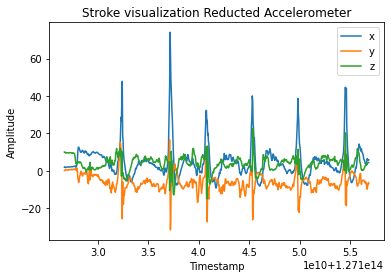

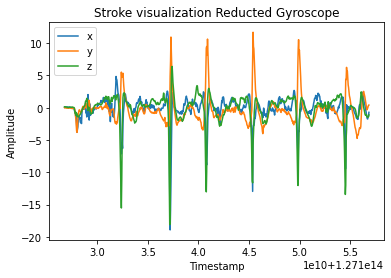

In [ ]:
start = 0
end = 750
show_data(timestamp_acc_red, x_acc_red, y_acc_red, z_acc_red, start, end, "Reducted Accelerometer")
show_data(timestamp_gyr_red, x_gyr_red, y_gyr_red, z_gyr_red, start, end, "Reducted Gyroscope")

In [ ]:
x_acc_red_grad = np.gradient(x_acc_red)
y_acc_red_grad = np.gradient(y_acc_red)
z_acc_red_grad = np.gradient(z_acc_red)

grad_tot = []

for i in range(len(x_acc_red_grad)):
  grad_tot.append(math.sqrt(pow(x_acc_red_grad[i], 2) + pow(y_acc_red_grad[i], 2) + pow(z_acc_red_grad[i], 2)))

print(len(timestamp_acc_red))
print(len(grad_tot))

27109
27109


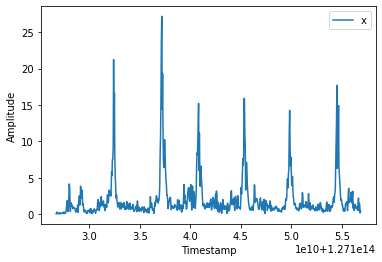

In [ ]:
start = 0
end = 750
timestamp_acc_red_fractionated = timestamp_acc_red[start:end]
grad_tot_fractionated = grad_tot[start:end]
plt.plot(timestamp_acc_red_fractionated, grad_tot_fractionated)
plt.xlabel("Timestamp")
plt.ylabel("Amplitude")
plt.legend(["x", "y","z"])
plt.show()

In [ ]:
print(len(grad_tot_fractionated))

750


In [ ]:
window_lenght = 20
threshold = 10

max_indexes = []

max_index = 0
max_value = 0

for i in range(0, len(grad_tot_fractionated), window_lenght):
  if i + window_lenght > len(grad_tot_fractionated):
      break
  for j in range(window_lenght):
    if (grad_tot_fractionated[i+j] > max_value) and (grad_tot_fractionated[i+j] > threshold):
      max_value = grad_tot_fractionated[i+j]
      max_index = i+j
  if(max_value > 0):
    max_indexes.append(max_index)
  max_index = 0
  max_value = 0


In [ ]:
print(len(max_indexes))
print(max_indexes)

7
[144, 259, 262, 352, 464, 575, 691]
